In [3]:
import sklearn
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from sklearn.ensemble import (BaggingRegressor,RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor

In [4]:
#extract data from web by datareader
def create_lagged_series(symbol, start_date, end_date, lags=3):
    ts=web.DataReader(symbol,'yahoo',start_date,end_date).sort_index()
    tslag=pd.DataFrame(index=ts.index)
    tslag['Today']=ts['Close']
    tslag['Volume']=ts['Volume']
    for i in range(0,lags):
    #create lag data
        tslag['lags'+str(i+1)]=ts['Close'].shift(i+1)
    tsret=pd.DataFrame(index=tslag.index)
    tsret['Volume']=tslag['Volume']
    tsret['Today']=tslag['Today'].pct_change()*100
    for i in range(0,lags):
        tsret['lags'+str(i+1)]=ts['Close'].shift(i+1).pct_change()*100
    tsret=tsret[tsret.index>=start_date]
    return tsret

Bagging_estimator: (10, 200)
Bagging_estimator: (20, 200)
Bagging_estimator: (30, 200)
Bagging_estimator: (40, 200)
Bagging_estimator: (50, 200)
Bagging_estimator: (60, 200)
Bagging_estimator: (70, 200)
Bagging_estimator: (80, 200)
Bagging_estimator: (90, 200)
Bagging_estimator: (100, 200)
Bagging_estimator: (110, 200)
Bagging_estimator: (120, 200)
Bagging_estimator: (130, 200)
Bagging_estimator: (140, 200)
Bagging_estimator: (150, 200)
Bagging_estimator: (160, 200)
Bagging_estimator: (170, 200)
Bagging_estimator: (180, 200)
Bagging_estimator: (190, 200)
Bagging_estimator: (200, 200)
rf_estimator: (10, 200)
rf_estimator: (20, 200)
rf_estimator: (30, 200)
rf_estimator: (40, 200)
rf_estimator: (50, 200)
rf_estimator: (60, 200)
rf_estimator: (70, 200)
rf_estimator: (80, 200)
rf_estimator: (90, 200)
rf_estimator: (100, 200)
rf_estimator: (110, 200)
rf_estimator: (120, 200)
rf_estimator: (130, 200)
rf_estimator: (140, 200)
rf_estimator: (150, 200)
rf_estimator: (160, 200)
rf_estimator: (170

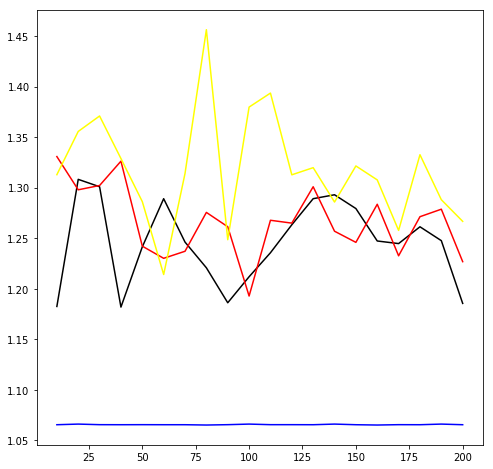

In [6]:
if __name__=='__main__':
    random_state=42
    n_jobs=5
    n_estimators=200
    step_factor=10
    axis_step=int(n_estimators/step_factor)
    start=pd.datetime(2006,1,1)
    end=pd.datetime(2010,1,1)
    google=create_lagged_series('GOOG',start,end,lags=3)
    google.dropna(inplace=True)
    x=google[['lags1','lags2','lags3']]
    y=google['Today']
    x=scale(x)
    y=scale(y)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=random_state)
    estimators=np.zeros(axis_step)
    bagging_mse=np.zeros(axis_step)
    rf_mse=np.zeros(axis_step)
    boosting_mse=np.zeros(axis_step)
    gradient_mse=np.zeros(axis_step)
    #bagging method
    for i in range(0,axis_step):
        print('Bagging_estimator:',(step_factor*(i+1),n_estimators))
        bagging=BaggingRegressor(DecisionTreeRegressor(),n_estimators=step_factor)
        bagging.fit(xtrain,ytrain)
        mse=mean_squared_error(ytest,bagging.predict(xtest))
        estimators[i]=step_factor*(i+1)
        bagging_mse[i]=mse 
    #random forest
    for i in range(0,axis_step):
        print('rf_estimator:',(step_factor*(i+1),n_estimators))
        rf=RandomForestRegressor(n_estimators=step_factor)
        rf.fit(xtrain,ytrain)
        mse=mean_squared_error(ytest,rf.predict(xtest))
        estimators[i]=step_factor*(i+1)
        rf_mse[i]=mse
    #gradient boosting method
    for i in range(0,axis_step):
        print('gradient_estimator:',(step_factor*(i+1),n_estimators))
        gradient=GradientBoostingRegressor(loss='ls',n_estimators=step_factor)
        gradient.fit(xtrain,ytrain)
        mse=mean_squared_error(ytest,gradient.predict(xtest))
        estimators[i]=step_factor*(i+1)
        gradient_mse[i]=mse
    #ada boosting method
    for i in range(0,axis_step):
        print('boosting_estimator:',(step_factor*(i+1),n_estimators))
        boosting=AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=step_factor)
        boosting.fit(xtrain,ytrain)
        mse=mean_squared_error(ytest,boosting.predict(xtest))
        estimators[i]=step_factor*(i+1)
        boosting_mse[i]=mse
    #plot the mse
    fig=plt.figure(figsize=(8,8))
    plt.plot(estimators,bagging_mse,color='black',label='bagging')
    plt.plot(estimators,rf_mse,color='red',label='rf')
    plt.plot(estimators,boosting_mse,color='yellow',label='boosting')
    plt.plot(estimators,gradient_mse,color='blue',label='gradient')
    plt.show()